## Environment Variables

In [53]:
FASTTEXT_BIN_FILENAME = "../../data/fasttext_wiki.simple/wiki.simple" # No extension
AGENDAS_FILE = "../agendas_2017"

## Load FastText word vectors

In [2]:
from gensim.models.fasttext import FastText 
ft_vectors = FastText.load_fasttext_format(FASTTEXT_BIN_FILENAME)

c:\users\yihua\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## Compute tag vectors

In [3]:
tag_list = [
  "Community",
  "Learning",
  "Health",
  "Economic opportunity",
  "Responsive government",
  "Environment",
  "Sustainability",
  "Public Safety",
  "Parks & Recreation",
  "Free Speech",
  "Housing",
  "Mobility",
  "Pets",
  "Zoning",
  "Infrastructure",
  "Sanitation",
]

import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize

def normalize_1d(arr):
  return normalize(arr.reshape((-1, 1)), axis=0).reshape(-1)

norm_tag_vectors_df = pd.DataFrame([[normalize_1d(ft_vectors[tag])] for tag in tag_list], index=tag_list)
norm_tag_vectors_df.head()

c:\users\yihua\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


,0
Community,"[0.10735343, 0.014057035, 0.056707624, -0.0995..."
Learning,"[-0.013729809, 0.018801544, 0.064229235, -0.19..."
Health,"[0.08409269, -0.026365058, 0.08656505, -0.0426..."
Economic opportunity,"[0.11906816, 0.026669413, 0.0435833, -0.045904..."
Responsive government,"[0.03052185, -0.07070705, 0.111598186, -0.0647..."


## Plotting and document vector helpers

In [4]:
import matplotlib.pyplot as plt 
import nltk
import re
from sklearn.manifold import TSNE

nltk.download('stopwords')
STOP_WORDS = nltk.corpus.stopwords.words()

def tsne_scatter_plot(vectors, tags, figsize=(20, 10)):
  tsne = TSNE(n_components=2)
  vectors_tsne = tsne.fit_transform(vectors)
  vectors_tsne_x = vectors_tsne[:, 0]
  vectors_tsne_y = vectors_tsne[:, 1]
  
  plt.rcParams["figure.figsize"] = figsize
  plt.scatter(vectors_tsne_x, vectors_tsne_y)
  for i, tag in enumerate(tags):
    plt.annotate(tag, (vectors_tsne_x[i], vectors_tsne_y[i]))
  plt.show()
  
def clean_sentence(ft_vectors, sentence):
  # Returns a list of tokens after lowercasing and removing punctuation + stop words.
  regex = re.compile('([^\s\w]|_)+')
  sentence = regex.sub('', sentence).lower().split()
  return [word for word in sentence if (word not in STOP_WORDS and word in ft_vectors.wv.vocab)]

def doc_vector_simple(word_vectors):
  return np.mean(word_vectors, axis=0)

# def doc_vector_sif(word_vectors):
#   return np.mean(word_vectors, axis=0)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yihua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##  Plot normalized tag vectors

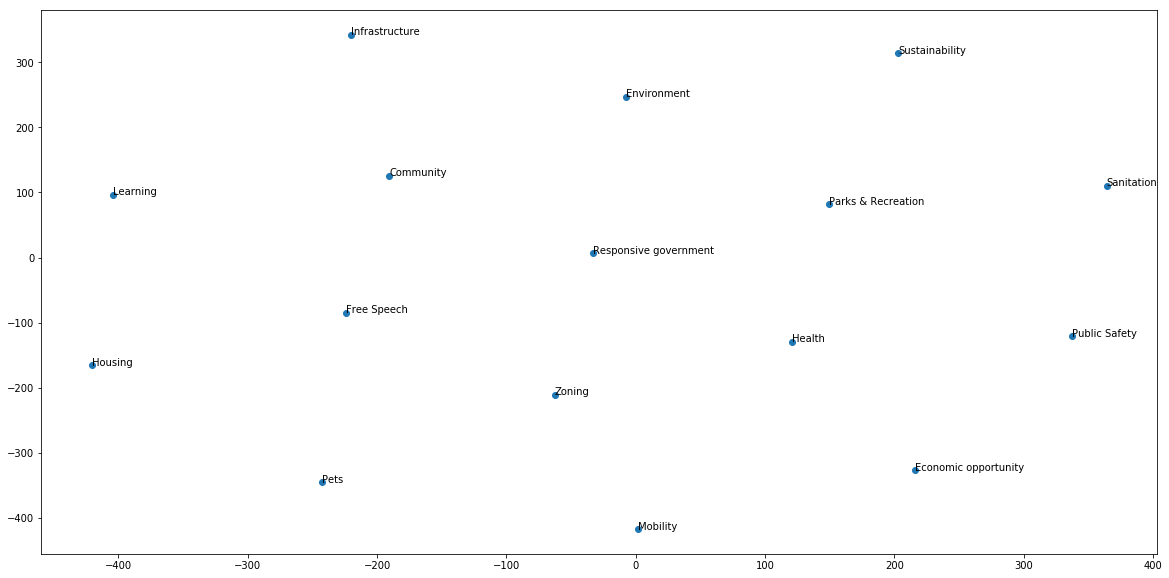

In [5]:
tsne_scatter_plot(norm_tag_vectors_df[0].tolist(), tag_list)

## Load agendas

In [54]:
import json

agenda_items = []
with open(AGENDAS_FILE) as agendas_file:  
  data = json.load(agendas_file)
  for k in data:
    for item_list in data[k]:
      agenda_items.extend(item_list)

## Load agendas into DataFrames

In [55]:
agenda_dfs = pd.DataFrame(index=[item["Title"] for item in agenda_items], columns=['title_doc_vector'])
for i, title in enumerate(agenda_dfs.index):
  title_word_vectors = [normalize_1d(ft_vectors[word]) for word in clean_sentence(ft_vectors, title)]
  agenda_dfs.iloc[i] = [doc_vector_simple(title_word_vectors)]

for tag in tag_list:
  agenda_dfs["title_rv_" + tag] = (agenda_dfs["title_doc_vector"] * norm_tag_vectors_df.loc[tag][0]).apply(lambda x: x.sum())
  
agenda_dfs.head()  

c:\users\yihua\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


,title_doc_vector,title_rv_Community,title_rv_Learning,title_rv_Health,title_rv_Economic opportunity,title_rv_Responsive government,title_rv_Environment,title_rv_Sustainability,title_rv_Public Safety,title_rv_Parks & Recreation,title_rv_Free Speech,title_rv_Housing,title_rv_Mobility,title_rv_Pets,title_rv_Zoning,title_rv_Infrastructure,title_rv_Sanitation
Annual Reporting of Development Impact Fees,"[0.030360704, 0.0046201823, 0.064442985, -0.08...",0.196370,0.268102,0.266914,0.361601,0.332440,0.278004,0.315136,0.270291,0.287030,0.203348,0.258945,0.273068,0.173236,0.226740,0.308177,0.293340
Construction Contract for the Beach Lifeguard Headquarters Facility Project,"[0.08036537, -0.005429083, 0.03268578, -0.0683...",0.223070,0.203473,0.229153,0.298696,0.314529,0.243299,0.250725,0.264832,0.307834,0.175687,0.290126,0.221224,0.147784,0.185694,0.329590,0.279489
Santa Monica Tourism Marketing District Annual Report,"[0.049768027, -0.003398062, 0.047734167, -0.04...",0.165348,0.208088,0.213852,0.301172,0.283218,0.205175,0.260009,0.233121,0.255709,0.202180,0.218841,0.168924,0.107520,0.136566,0.231398,0.227913
Funding for Affordable Housing In Venice,"[0.08354552, 0.028868727, 0.065896735, -0.0738...",0.254582,0.267710,0.353900,0.378399,0.383121,0.309726,0.358890,0.310272,0.305401,0.172107,0.443481,0.324179,0.212003,0.193097,0.397745,0.318619
Contract Approval for Design Services for Olympic Boulevard Sidewalk and Pedestrian Improvements,"[0.033686385, -0.014413595, 0.011930749, -0.05...",0.163404,0.207847,0.204558,0.262636,0.277116,0.202194,0.253370,0.285092,0.303107,0.194327,0.279991,0.268414,0.192283,0.183417,0.287764,0.265262


## Plot title document vectors

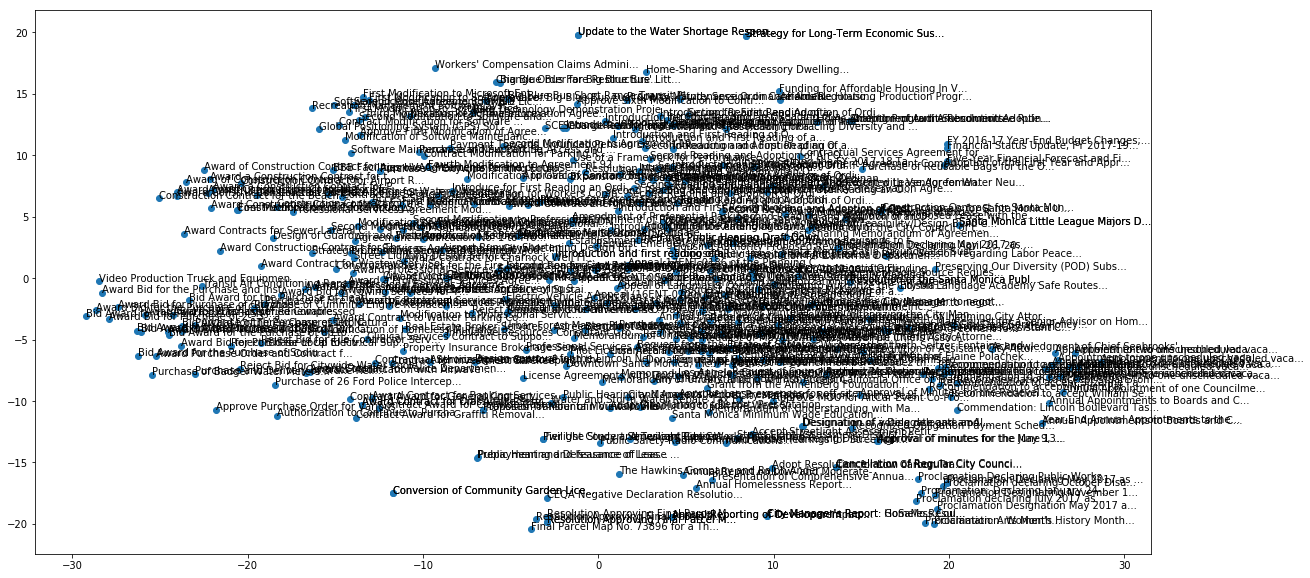

In [56]:
tsne_scatter_plot(agenda_dfs["title_doc_vector"].tolist(), [title[:35] + "..." for title in agenda_dfs.index])

## Plot projections on tag vectors

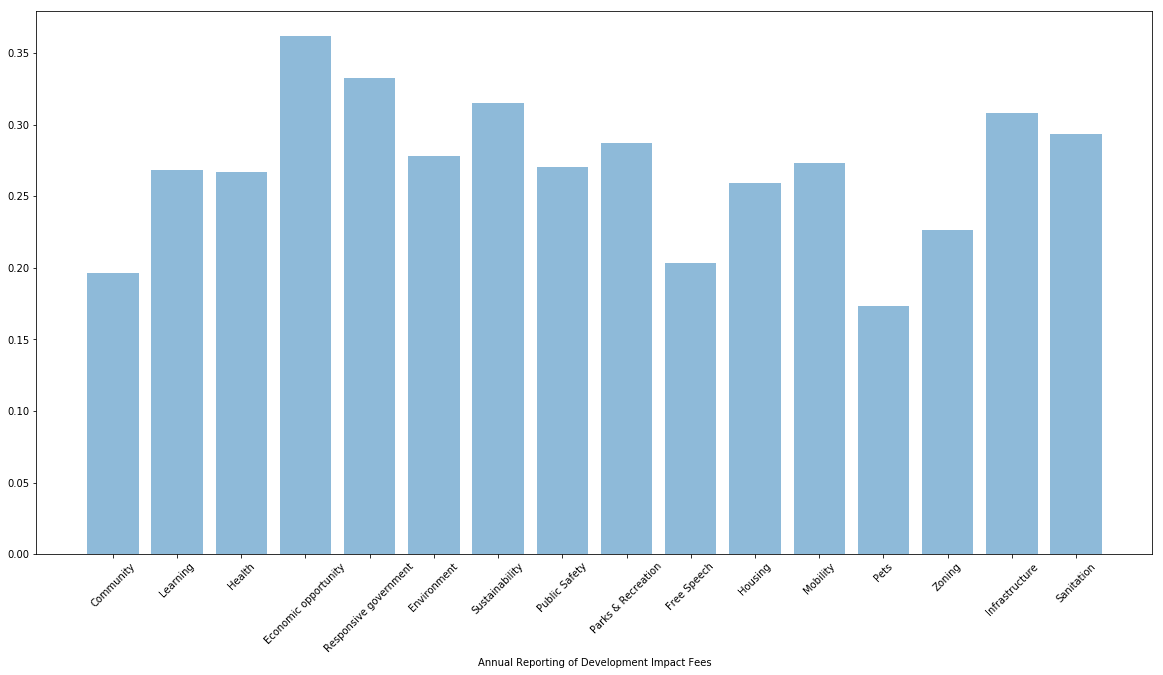

In [57]:
def plot_relevancy_vector(vector, title):
  y_pos = np.arange(len(tag_list))
  plt.bar(y_pos, vector, align='center', alpha=0.5)
  plt.xticks(y_pos, tag_list, rotation=45)
  plt.xlabel(title)
  plt.show()
  
plot_relevancy_vector(agenda_dfs.iloc[0,1:], agenda_dfs.index[0])

## List most relevant documents for each tag

In [58]:
agenda_dfs.sort_values(by="title_rv_", ascending=False).head(10)

,title_doc_vector,title_rv_Community,title_rv_Learning,title_rv_Health,title_rv_Economic opportunity,title_rv_Responsive government,title_rv_Environment,title_rv_Sustainability,title_rv_Public Safety,title_rv_Parks & Recreation,title_rv_Free Speech,title_rv_Housing,title_rv_Mobility,title_rv_Pets,title_rv_Zoning,title_rv_Infrastructure,title_rv_Sanitation
Strategy for Long-Term Economic Sustainability,"[0.111691654, -0.032399997, 0.07884707, -0.114...",0.241412,0.285229,0.410534,0.485848,0.400573,0.427577,0.589508,0.264233,0.310857,0.265692,0.322466,0.392191,0.147938,0.221008,0.422211,0.352466
Strategy for Long-Term Economic Sustainability,"[0.111691654, -0.032399997, 0.07884707, -0.114...",0.241412,0.285229,0.410534,0.485848,0.400573,0.427577,0.589508,0.264233,0.310857,0.265692,0.322466,0.392191,0.147938,0.221008,0.422211,0.352466
Property Insurance Brokerage Services,"[0.036513045, 0.001275836, 0.058634136, -0.064...",0.210329,0.268380,0.360157,0.353420,0.414352,0.284031,0.350901,0.347175,0.267694,0.186547,0.360722,0.360203,0.183079,0.190020,0.394177,0.335306
Proclamation Declaring May 2017 as Mental Health Awareness Month,"[0.020494929, -0.01756509, 0.021806175, -0.024...",0.206220,0.292818,0.355631,0.302754,0.327524,0.255751,0.330138,0.347507,0.272282,0.262785,0.274443,0.303366,0.166277,0.263432,0.235941,0.346671
Funding for Affordable Housing In Venice,"[0.08354552, 0.028868727, 0.065896735, -0.0738...",0.254582,0.267710,0.353900,0.378399,0.383121,0.309726,0.358890,0.310272,0.305401,0.172107,0.443481,0.324179,0.212003,0.193097,0.397745,0.318619
Payment Towards Unfunded Pension Liability,"[0.030546404, 0.06456915, 0.047431007, -0.0431...",0.187011,0.311709,0.340236,0.366425,0.356647,0.280205,0.344036,0.345322,0.257449,0.185354,0.349664,0.394526,0.148360,0.223201,0.312553,0.312399
Planning for Potential Parks Funding,"[0.097718425, 0.0246648, 0.063700095, -0.09959...",0.211511,0.263695,0.334344,0.363982,0.393466,0.311672,0.347154,0.288590,0.374289,0.207235,0.368591,0.276974,0.197363,0.215339,0.362829,0.302993
Contract for Investment Safekeeping Services,"[0.046751343, 0.016022116, 0.014810362, -0.061...",0.161805,0.285489,0.332777,0.363436,0.401725,0.278535,0.336847,0.306010,0.286314,0.186657,0.346288,0.335791,0.223359,0.219341,0.362529,0.321483
Strategic Communications and Community Outreach Services,"[0.07689962, -0.03042176, 0.053990163, -0.0745...",0.390538,0.270132,0.329356,0.357631,0.384358,0.290386,0.379327,0.317988,0.286414,0.199739,0.308666,0.295424,0.209759,0.171326,0.404159,0.316145
Innovative Resources Consultant Group Agreement,"[0.060073216, -0.031213716, 0.04457607, -0.085...",0.218049,0.233307,0.325020,0.346784,0.356639,0.271509,0.341404,0.301756,0.242838,0.182706,0.252875,0.275799,0.175108,0.188590,0.316864,0.257550
